In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = [[0,3.261,72],[3,3.260,70],[7,3.258,66],[11,3.257,53],[14,3.256,50],[17,3.253,44]]
corrosion_al = pd.DataFrame(data,columns=['Days','Weight(g)','PD(mv)'])

corrosion_al

,Days,Weight(g),PD(mv)
0,0,3.261,72
1,3,3.260,70
2,7,3.258,66
3,11,3.257,53
4,14,3.256,50
5,17,3.253,44


In [3]:
# To calculate the weight loss
# Initial Weight of bronze(Wi) = 3.261g
# Weight_loss = Wi-W
Wi = 3.261
corrosion_al['Weight_loss(g)'] = Wi- corrosion_al['Weight(g)']

# To convert P.D to Standard hydrogen electrode(SHE) : PD - 1038
# mv : milli_volts
corrosion_al['SHE(mv)'] = corrosion_al['PD(mv)'] - 1038

# To calculate the cumulative weight loss(g)
def cumulative_points(points): # a function to perform cumulative_points.
    cumulative_list = []
    total = 0
    for point in points:
        total += point
        cumulative_list.append(total)
    return cumulative_list
corrosion_al['Cumulative_weight_loss(g)']= cumulative_points(corrosion_al['Weight_loss(g)'])

corrosion_al

,Days,Weight(g),PD(mv),Weight_loss(g),SHE(mv),Cumulative_weight_loss(g)
0,0,3.261,72,0.000,-966,0.000
1,3,3.260,70,0.001,-968,0.001
2,7,3.258,66,0.003,-972,0.004
3,11,3.257,53,0.004,-985,0.008
4,14,3.256,50,0.005,-988,0.013
5,17,3.253,44,0.008,-994,0.021


In [4]:
# To calculate corrosion rate. height= h, diameter = d, radius = r, Total surface area = A, density= e: all in millimeters
h =5.5 
d = 18.3
r = 9.15 
# using A= 2(22/7)r(r+h)
A =  (2*(22/7)*r*(r+h))/100
K = 87500
e = 2.7
print(A)
corrosion_al['Corrosion_rates(mm/day)'] = round((K*corrosion_al['Weight_loss(g)']) / (A*e*(corrosion_al['Days'])), 3)
corrosion_al

8.425842857142857


,Days,Weight(g),PD(mv),Weight_loss(g),SHE(mv),Cumulative_weight_loss(g),Corrosion_rates(mm/day)
0,0,3.261,72,0.000,-966,0.000,NaN
1,3,3.260,70,0.001,-968,0.001,1.282
2,7,3.258,66,0.003,-972,0.004,1.648
3,11,3.257,53,0.004,-985,0.008,1.399
4,14,3.256,50,0.005,-988,0.013,1.374
5,17,3.253,44,0.008,-994,0.021,1.810


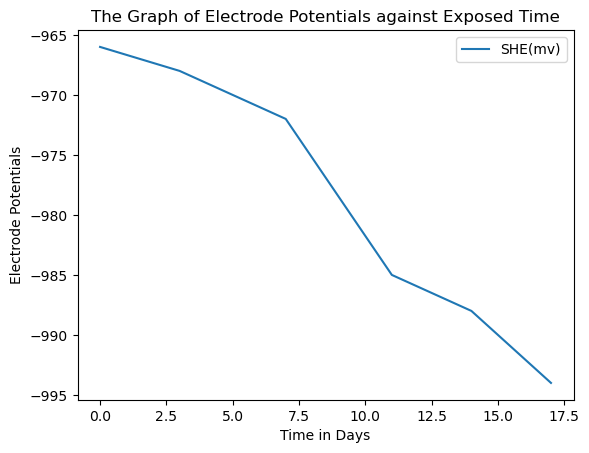

In [5]:
corrosion_al.plot.line(x='Days', y='SHE(mv)')
plt.title('The Graph of Electrode Potentials against Exposed Time')
plt.xlabel('Time in Days')
plt.ylabel('Electrode Potentials')
plt.show()

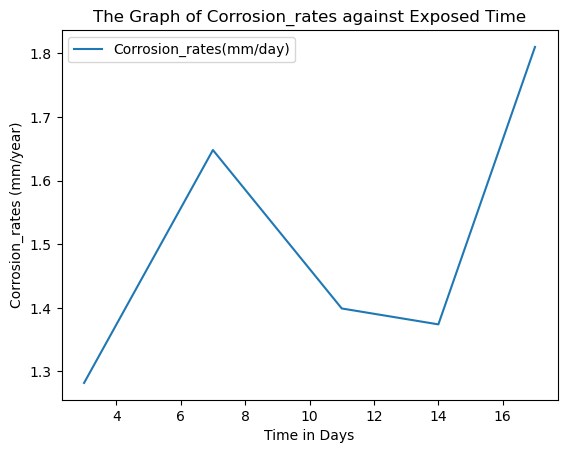

In [6]:
corrosion_al.plot.line(x='Days', y='Corrosion_rates(mm/day)')
plt.title('The Graph of Corrosion_rates against Exposed Time')
plt.xlabel('Time in Days')
plt.ylabel('Corrosion_rates (mm/year)')
plt.show()